In [1]:
import pandas as pd
import geopandas as gp
import shapely as sp
from shapely.geometry import Point, Polygon, MultiPolygon
import numpy as np

In [4]:
polygon = Polygon([(1,0),(3,0),(3,2),(1,2)])
polygon.area

4.0

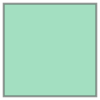

In [5]:
polygon

In [6]:
polygon.bounds

(1.0, 0.0, 3.0, 2.0)

In [7]:
poly2 = Polygon([(1,1),(2,1),(2,3),(1,3)])
poly2.area

2.0

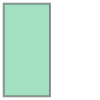

In [8]:
poly2

In [9]:
comb1 = MultiPolygon([polygon, poly2])

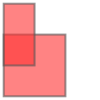

In [10]:
comb1

In [11]:
comb1.area

6.0

In [12]:
print(comb1.area)
print(poly2.area)
print(polygon.area)

6.0
2.0
4.0


In [13]:
x = polygon.intersection(poly2)

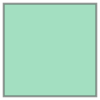

In [14]:
x

In [15]:
x.area

1.0

2.0


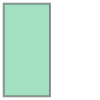

In [16]:
poly3 = Polygon([(4,1),(4,3),(5,3),(5,1)])
print(poly3.area)
poly3

In [17]:
y = polygon.intersection(poly2).intersection(poly3)

In [18]:
y.area

0.0

can clearly string .intersections together, but what about with the comb1, multipolygon class.  Can we find the intersection within that?

In [19]:
comb1.intersection()

TypeError: intersection() missing 1 required positional argument: 'other'

So I'm going to have to do the following: (assuming we can't find intersection from multipoly directly, still need to look into)

Create the hirise image shapes as polygons 

Store all of them as a multipoly, by region

Within each region (and thus within each multipoly) go through and try every combination of intersecting and store the areas.  Maybe not all areas? Maybe all?  Need to maximize both the areas from the intersections and the number of the polygons (which means the maximum number of hirise images)
The above will be hard to decide before actually doing it, seeing how the overlapping areas and number of things included work out.  Maybe have it spit out the maximum number of polygons used that still have a positive area as well as the maximum area (with its associated number of polygons used), maybe top 15?  So it spits out the highest 15 areas as well as the associated number of polygons making those up?  Top 15 if there are a lot of hirise images, some regions have only 2!  maybe 15 is too much but might be a good jumping off point.  Figure out maximum number of hirise images in a region then come back to this to decide.

Naw above is too much, instead use cascaded union and combination pairs! See below link for further details:
https://gis.stackexchange.com/questions/11987/polygon-overlay-with-shapely/11990#11990

Lets create a bigger set of artifical polygons, maybe 10 of them, then mess around with optimizing.

In [20]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
np.random.random([])*100

3.2676307129336557

In [22]:
#this creates 10 random polygons
polybucket = []
for i in np.arange(10):
    x = np.random.random([])*100
    x2 = np.random.random([])*200
    while x2 < x:
        x2 = np.random.random([])*200
    y = np.random.random([])*100
    y2 = np.random.random([])*200
    while y2 < y:
        y2 = np.random.random([])*200
    randpoly = Polygon([(x,y),(x2,y),(x2,y2),(x,y2)])
    polybucket.append(randpoly)

How to make a multipoly from the polygons within polybucket?

In [25]:
from shapely.ops import cascaded_union
from itertools import combinations

In [24]:
len(polybucket)

10

In [25]:
np.arange(len(polybucket)+1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [26]:
#ignore the multipoly for now, just use polybucket
for i in np.arange(len(polybucket)+1):
    combos = combinations(polybucket, i)  #these lines give every poss. combo.
for comb in combos:
    inter = cascaded_union([comb]) 
#need to do every intersection somehow
#like comb[0].intersection(comb[1]).intersection... .intersection(comb[-1])
    
    
#cascaded union sueprceded by unary union nowadays


AttributeError: 'tuple' object has no attribute '_geom'

In [2]:
from shapely.ops import polygonize, unary_union

In [28]:
#for n = 3
polybox = ([polygon, poly2, poly3])

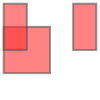

In [29]:
polyboxshape = MultiPolygon([polygon, poly2, poly3])
polyboxshape

In [30]:
polybox

In [31]:
#inter = cascaded_union([pair[0].intersection(pair[1]) for pair in combinations(shapes, 2)])
inter = cascaded_union([combo[0].intersection(combo[1]) for combo in combinations(polybox, 2)])

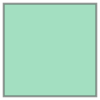

In [32]:
inter

In [33]:
inter.area

1.0

In [34]:
inter2 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]) for combo in combinations(polybox, 3)])

In [35]:
inter2

In [36]:
#seems to work right, need more illustrative example with multiple overlaps
#see best way to pick out the largest, add another polygon with overlap of area 1 and overlap of area 2

4.0


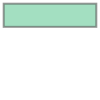

In [37]:
poly4 = Polygon([(1,1),(5,1),(5,2),(1,2)])
print(poly4.area)
poly4

In [38]:
polybox2 = [polygon, poly2, poly3, poly4]

In [39]:
polybox2

In [40]:
polybox2shape = MultiPolygon([polygon, poly2, poly3, poly4])

In [41]:
polybox2shape.area

12.0

In [42]:
polybox2shape.intersection()

TypeError: intersection() missing 1 required positional argument: 'other'

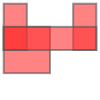

In [43]:
polybox2shape

In [44]:
inter3 = cascaded_union([combo[0].intersection(combo[1]).intersection(combo[2]).intersection(combo[3]) for combo in combinations(polybox2, 4)])

In [45]:
inter3 
#no results because combinations(polybox2, 4) needs all 4 in it

In [46]:
arr = [1,2,3,4]
r = 3
this = np.asarray(list(combinations(arr, r)))
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [47]:
this

array([[1, 2, 3],
       [1, 2, 4],
       [1, 3, 4],
       [2, 3, 4]])

In [48]:
print(this[0])
print(this[0][0])

[1 2 3]
1


In [49]:
#lets test on polybox2
x1 = list(combinations(polybox, 1))
x1

[(<shapely.geometry.polygon.Polygon at 0x1c0bb695860>,),
 (<shapely.geometry.polygon.Polygon at 0x1c0bb695c88>,),
 (<shapely.geometry.polygon.Polygon at 0x1c0bb6b5710>,)]

In [50]:
type(x1[0])
x1[0]

(<shapely.geometry.polygon.Polygon at 0x1c0bb695860>,)

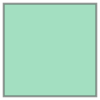

In [51]:
polybox2[0]

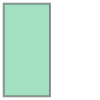

In [52]:
polybox2[1]

In [3]:
import functools

In [54]:
print(functools.reduce(sp.intersection,polybox2))
#if we get this to work, we're done, just add dictionary output.
#Otherwise close on whiteboard brute force with combinatorics

AttributeError: module 'shapely' has no attribute 'intersection'

In [55]:
#do what we discussed
polybox2 = [polygon, poly2, poly3, poly4]
iterable = range(len(polybox2))
r = len(polybox2)
for n in iterable:
    if r > 0:
        #print(r)
        comb = list(combinations(iterable,r))
        print(comb)#literally a list object
        for item in comb:
            if len(item) > 1:
                print(item)
                #print(len(comb[num]))
                x = item
            else:
                continue
        #y = MultiPolygon[]
            #for ele in x:
            #want like ele[0].intersection... .intersection(ele[-1])
            
        r = r-1
    else: 
        end

[(0, 1, 2, 3)]
(0, 1, 2, 3)
[(0, 1, 2), (0, 1, 3), (0, 2, 3), (1, 2, 3)]
(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)
[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
[(0,), (1,), (2,), (3,)]


In [56]:
#do as above, but to get at the end combo = [comb1, comb2,...,combn]
combos = []
polybox2 = [polygon, poly2, poly3, poly4]
iterable = range(len(polybox2))
r = len(polybox2)
for n in iterable:
    if r > 0:
        comb = list(combinations(iterable,r))
        for item in comb:
            #print(item)
            
            x = item
            combos.append(x)
        r = r-1
    else: 
        end

In [57]:
combos #perfect, this is what we need for the final version

[(0, 1, 2, 3),
 (0, 1, 2),
 (0, 1, 3),
 (0, 2, 3),
 (1, 2, 3),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 2),
 (1, 3),
 (2, 3),
 (0,),
 (1,),
 (2,),
 (3,)]

In [58]:
combos[0]

(0, 1, 2, 3)

In [59]:
len(combos)

15

In [60]:
polyboxshape.append(polybox[0])

AttributeError: 'MultiPolygon' object has no attribute 'append'

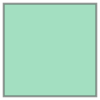

In [61]:
polybox[0]

In [62]:
y = [(0, 1, 2, 3)]

In [63]:
print(y[0])
print(y[0][0])

(0, 1, 2, 3)
0


In [64]:
print(comb)
print(len(comb))

[(0,), (1,), (2,), (3,)]
4


In [65]:
len(y)

1

In [66]:
#import dask

below is testing geopandas stuff

In [67]:
#testing geopandas stuff
from shapely.geometry import Polygon

In [68]:
polys1 = gp.GeoSeries(
    [
        Polygon([(0,0), (2,0), (2,2), (0,2)]),
        #Polygon([(2,2), (4,2), (4,4), (2,4)])
    ])
polys2 = gp.GeoSeries(
    [
    #    Polygon([(1,1), (3,1), (3,3), (1,3)]),
        Polygon([(3,3), (5,3), (5,5), (3,5)])
    ])

In [69]:
polys1

0    POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))
dtype: object

In [70]:
gp.GeoDataFrame?

In [71]:
df1 = gp.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

ValueError: array length 2 does not match index length 1

In [72]:
df1 = gp.GeoDataFrame({'geometry': polys1})

In [73]:
df1

,geometry
0,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))"


In [74]:
df2 = gp.GeoDataFrame({'geometry': polys2, 'df2':[5,3]})

ValueError: array length 2 does not match index length 1

In [ ]:
df2 = gp.GeoDataFrame({'geometry': polys2})

In [75]:
df2

NameError: name 'df2' is not defined

In [76]:
ax = df1.plot(color = 'red');
df2.plot(ax = ax, color = 'green', alpha = 0.5)

NameError: name 'df2' is not defined

In [ ]:
try:
    res_inter = None
    res_inter = gp.overlay(df1, df2, how='intersection')
except KeyError:
    pass
else:
    print(res_inter)

In [ ]:
res_inter.geometry[0].area
#go through each of these geometries and sum the areas
#pandas has a way to do this easily with a dataframe, remember how
#recreate the dataframe with the way michael wanted, that is
#with taking the bounds instead of the way I did it. see his text.

In [77]:
res_inter.geometry.area.sum()

NameError: name 'res_inter' is not defined

That works fine, so now I just need to recreate the dataframe of polygons the way that michael wants them.  Once that's recreated I group by area, make a loop to go through by area creating these dataframes for each and then taking intersection, have a dictionary report the area.sum() and the region, as well as how many polygons make it up (and therefore how many hirise images which indicates the spread of time).  

Oh wait, it doesnt work fine.  Lets test out the try and except stuff with my red polygon from before, as it has the possible cases included.  Try it overlaid with itself as well.  Have exception not pass, but instead return an area of zero.

In [78]:
polybox2 = [polygon, poly2, poly3, poly4]

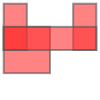

In [79]:
polybox2shape

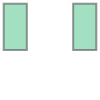

In [80]:
polybox2shape[1:3]

In [81]:
t1 = gp.GeoDataFrame({'geometry': gp.GeoSeries(polygon)})
t2 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly2)})
t3 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly3)})
t4 = gp.GeoDataFrame({'geometry': gp.GeoSeries(poly4)})

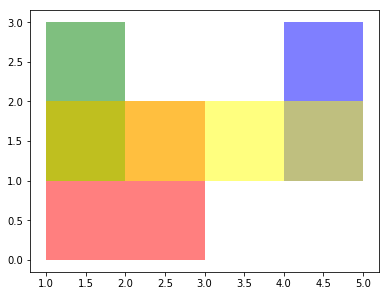

In [82]:
ax = t1.plot(color = 'red', alpha = 0.5);
t2.plot(ax = ax, color = 'green', alpha = 0.5);
t3.plot(ax = ax, color = 'blue', alpha = 0.5);
t4.plot(ax = ax, color = 'yellow', alpha = 0.5)

In [83]:
try:
    res_inter = None
    res_inter = gp.overlay(df1, df2, how='intersection')
except KeyError:
    #pass
    print(2)
else:
    print(1)

NameError: name 'df2' is not defined

In [84]:
polygon.area #polygon is t1, so intersecting it with itself seems correct.

4.0

In [85]:
#res_union = gp.overlay(t1, t2, t3, t4, how = 'intersection')
#above not allowed, have to go pair by pair. Ew.
try:
    res_inter = gp.overlay(t1, t1, how = 'intersection')
except KeyError:
    pass
else:
    print(res_inter.geometry.area)

0    4.0
dtype: float64


In [86]:
#so it seems to work fine for intersecting with itself here.

In [87]:
res_inter

,geometry
0,"POLYGON ((1 0, 1 2, 3 2, 3 0, 1 0))"


above moves on when there is a problem with intersection, seems to be exactly what we want- is there any case other than there being no intersection for which a key error is raised?  Can be problematic and idk how to figure out.  also now need to go through each and every combination in gp.overlay(df1, df2) pairs.  Can only be pairs, problematic as we often have way more than 2 in a region.  How to fix?

Fix by writing a loop that for a region, creates an object for the intersection of two, call it x, then does the intersection between x and the third, call that y, then the intersection between y and the 4th, call that... etc etc until all combinations are done.  

Actually gp.overlay(df1, df2, how = 'intersection') can accept multipolygons meaning that we use my loop earlier to go through each bit with combinatorics, find the possible combinations, then have to use those results to create a multipolygon and take the intersection with itself.  to get the area! 

In [88]:
#polybox2shape is the multipolygon of polybox2
#want to try overlaying the multipolygon with itself

pb2 = gp.GeoDataFrame({'geometry': gp.GeoSeries(polybox2shape)})
try:
    res_inter = gp.overlay(pb2, pb2, how = 'intersection')
except KeyError:
    pass
else:
    print(res_inter.geometry.area)

0    8.0
dtype: float64


In [89]:
polybox2shape.area

12.0

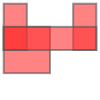

In [90]:
polybox2shape

In [91]:
pb2.area

0    12.0
dtype: float64

In [92]:
bucket = [0, 1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15]
print(bucket)
for i in range(len(bucket)-2):
    #print(i)
    print(i+2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [93]:
#this one does what the next does, but excludes individual polygons
for item in comb:
            if len(item) > 1:
                print(item)
                #print(len(comb[num]))
                x = item
            else:
                continue



def interchecker(polygon_array):
    """
    
    """
    combos = []
    iterable1 = range(len(polygon_array)) 
    p = len(polygon_array)
    for n in iterable1:
        if p > 0:
            comb = list(combinations(iterable1,p))
            for item in comb:
                if len(item) >1:
                    x = item
                    combos.append(x)
                else:
                    continue
            p = p-1
        else:
            end
    #the above gives us an array of each possible combination eg
    #combos = [comb[0],comb[1],...]
    #where comb[0] could be (0,1,2,4) or something of the sort
    
    for ele in combos:
        print(ele) #shows the element used
        bucket = []
        for number in ele:
            bucket.append(polygon_array[number])
            #bucket now [poly0, poly1, poly2, poly4] if using comb[0] above
        y = bucket[0].intersection(bucket[1])
        for i in range(len(bucket)-2):
            y = y.intersection(bucket[i+2])
        print(y.area)
        
        #need an except statement in here in case the intersection has error
        #actually maybe not, this is .intersection- didnt throw errors just gave 0

In [307]:
test = np.array(polybox2)

In [308]:
test

array([<shapely.geometry.polygon.Polygon object at 0x000001C0BB695860>,
      dtype=object)

In [4]:
def interchecker(polygon_array):
    """
    
    """
    bucket2 = []
    combos = []
    iterable1 = range(len(polygon_array)) 
    p = len(polygon_array)
    for n in iterable1:
        if p > 0:
            comb = list(combinations(iterable1,p))
            for item in comb:
                x = item
                combos.append(x)
            p = p-1
        else:
            end

    #the above gives us an array of each possible combination eg
    #combos = [comb[0],comb[1],...]
    #where comb[0] could be (0,1,2,4) or something of the sort
    
    for ele in combos:
        d = {}
        #print(ele) #shows the element used
        #d['region_name'] = region
        #d['index_used'] = ele #for testing
        bucket = []
        for number in ele:
            bucket.append(polygon_array[number])
            #bucket now [poly0, poly1, poly2, poly4] if using comb[0] above
        d['elements_used'] = np.array(bucket)
        if len(bucket)>1:
            y = bucket[0].intersection(bucket[1])
            for i in range(len(bucket)-2):
                y = y.intersection(bucket[i+2])
            #print(y.area)
            d["combo_area"]= y.area
        else:
            #print(bucket[0].area)
            d['combo_area'] = bucket[0].area
        #for number in ele:
            #d['elements_used'] = polygon_array[number]
            #must move elements used to get every element used- where?
        bucket2.append(d)
    return pd.DataFrame(bucket2)

a few checks we can do by eye on what does pop out; any that involve 0 and 2  or 1 and 2 together should have an area of 0
(0,1)=1
(0,2)=0
(0,3)=2
...etc
looks like problem was with single elements, these should be taken out anyways as it isn't an intersection then!  Lets remove single element combos from combos.

In [345]:
y = interchecker(polybox2)

In [346]:
y.head()

,combo_area,elements_used
0,0.0,"[POLYGON ((1 0, 3 0, 3 2, 1 2, 1 0)), POLYGON ..."
1,0.0,"[POLYGON ((1 0, 3 0, 3 2, 1 2, 1 0)), POLYGON ..."
2,1.0,"[POLYGON ((1 0, 3 0, 3 2, 1 2, 1 0)), POLYGON ..."
3,0.0,"[POLYGON ((1 0, 3 0, 3 2, 1 2, 1 0)), POLYGON ..."
4,0.0,"[POLYGON ((1 1, 2 1, 2 3, 1 3, 1 1)), POLYGON ..."


Okay so now I want to change interchecker_test to give dictionary outputs for the obsid's used, and the area of the combo.  Need to add L_s of each obsid used at some point too but lets worry about that after.  Do this by region, so we find all obsid's within a region, run it through michaels thing to get the polygon, use the polygon in my interchecker_test. Remember inerchecker_test takes in a list of polygons as input

In [5]:
olddata = pd.read_csv("n_obj_df.csv")

In [6]:
olddata.head()

,Latitude,Ls,MY,Which,fraction,n_objects,obsid,pixel_area,region_name
0,-85.4074,214.785,29,both,0.115,933,ESP_012079_0945,2.551911e+07,Macclesfield
1,-85.4065,183.727,29,both,0.070,1971,ESP_011407_0945,2.592302e+06,Macclesfield
2,-85.4056,198.040,29,both,0.072,1525,ESP_011723_0945,8.455380e+06,Macclesfield
3,-85.4049,207.892,29,both,0.168,788,ESP_011934_0945,7.357966e+06,Macclesfield
4,-85.4067,235.282,29,both,0.111,1285,ESP_012501_0945,4.882627e+06,Macclesfield


In [7]:
allobs = olddata.obsid.unique() #give me every obsid
#allobs

In [8]:
allregion = olddata.region_name.unique()
allregion

array(['Macclesfield', 'Starburst', 'Manhattan_Classic', 'Wellington',
       'Albany', 'Bilbao', 'Ithaca', 'Portsmouth', 'Pisaq',
       'Manhattan_Frontinella', 'BuenosAires', 'Inca_City_Ridges',
       'Inca_City', 'Giza', 'Potsdam', 'Troy', 'Oswego_Edge', 'Halifax',
       'Caterpillar', 'Rochester', 'Manhattan_Cracks', 'Schenectady',
       'Binghamton', 'Atka', 'Cortland', 'Geneseo'], dtype=object)

In [9]:
import pandas as pd
import intake
from shapely.geometry import MultiPoint

In [130]:
#from ipynb.fs.full.shapely_work import get_outer_polygon_for_obsid
#For some reason this threw an error that 'pd is not defined', but it is
#for now just copy/paste the function since it's small

In [10]:
from shapely.geometry import MultiPoint


def get_outer_polygon_for_obsid(obsid, return_hull=True):
    tiles = pd.read_csv("tile_coordinates.csv")
    obsid_tiles = tiles.query("obsid == @obsid")
    cols = "BodyFixedCoordinateX BodyFixedCoordinateY".split()
    coords = obsid_tiles[cols]
    coords.columns = ["x", "y"]
    mp = MultiPoint(list(zip(coords.x, coords.y)))
    if return_hull:
        return mp.convex_hull
    else:
        return mp

In [146]:
olddata[olddata['region_name'] == 'Macclesfield'].obsid.unique()

array(['ESP_012079_0945', 'ESP_011407_0945', 'ESP_011723_0945',
       'ESP_011934_0945', 'ESP_012501_0945', 'ESP_012290_0945',
       'ESP_011406_0945', 'ESP_021494_0945', 'ESP_020782_0945',
       'ESP_020716_0945', 'ESP_020571_0945', 'ESP_020294_0945',
       'ESP_020927_0945', 'ESP_020242_0945'], dtype=object)

In [11]:
bucket = []
for region in olddata.region_name.unique():
    for obs in olddata[olddata['region_name'] == region].obsid.unique():
        d = {}
        d['region_name'] = region
        d['Obsid Used'] = obs
        x = get_outer_polygon_for_obsid(obs)
        area = x.area
        d['Obsid Area'] = area
        bucket.append(d)
results = pd.DataFrame(bucket)
        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Zade Alfalah\AppData\Local\conda\conda\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-06fb37cc4864>", line 7, in <module>
    x = get_outer_polygon_for_obsid(obs)
  File "<ipython-input-10-4861f14b03bd>", line 5, in get_outer_polygon_for_obsid
    tiles = pd.read_csv("tile_coordinates.csv")
  File "C:\Users\Zade Alfalah\AppData\Local\conda\conda\envs\py37\lib\site-packages\pandas\io\parsers.py", line 678, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\Zade Alfalah\AppData\Local\conda\conda\envs\py37\lib\site-packages\pandas\io\parsers.py", line 446, in _read
    data = parser.read(nrows)
  File "C:\Users\Zade Alfalah\AppData\Local\conda\conda\envs\py37\lib\site-packages\pandas\io\parsers.py", line 1036, in read
    ret = self._engine.read(nrows)
  File "C:\Users\Zade Alfalah\AppData\Local\cond

KeyboardInterrupt: 

In [ ]:
results.head() #neat, that's what I wanted!

okay so now I have all the pieces, want to create a loop that goes by region, gives me a list of polygons as output for the region so that I can feed it into the function I wrote

In [ ]:
allregion[0]

In [ ]:
olddata[olddata['region_name'] == 'Macclesfield'].obsid.unique()

In [ ]:
x = get_outer_polygon_for_obsid('ESP_020716_0945')
y = get_outer_polygon_for_obsid('ESP_011934_0945')

In [ ]:
bucket = []
bucket.append(x)
bucket.append(y)
print(bucket)

In [192]:
from IPython.display import display, HTML

Above is good but missing important things, want to redo interchecker_test so that it gives the region used as a line, as well as making it so elements used returns the obsids as a list instead of the number in the array that it is

In [343]:
def interchecker_test(polygon_df):
    """
    
    """
    bucket2 = []
    combos = []
    iterable1 = range(len(polygon_df[0])) 
    p = len(polygon_df[0])
    for n in iterable1:
        if p > 0:
            comb = list(combinations(iterable1,p))
            for item in comb:
                x = item
                combos.append(x)
            p = p-1
        else:
            end

    #the above gives us an array of each possible combination eg
    #combos = [comb[0],comb[1],...]
    #where comb[0] could be (0,1,2,4) or something of the sort
    
    for ele in combos:
        d = {}
        #print(ele) #shows the element used
        #d['region_name'] = region
        #d['index_used'] = ele #for testing
        bucket = []
        for number in ele:
            bucket.append(polygon_df[0][number])
            #bucket now [poly0, poly1, poly2, poly4] if using comb[0] above
        d['elements_used'] = np.array(bucket)
        if len(bucket)>1:
            y = bucket[0].intersection(bucket[1])
            for i in range(len(bucket)-2):
                y = y.intersection(bucket[i+2])
            #print(y.area)
            d["combo_area"]= y.area
        else:
            #print(bucket[0].area)
            d['combo_area'] = bucket[0].area
        #for number in ele:
            #d['elements_used'] = polygon_array[number]
            #must move elements used to get every element used- where?
        bucket2.append(d)
    return pd.DataFrame(bucket2)

In [27]:
bucket = []
bucket2 = []
for region in allregion:
    for obs in olddata[olddata['region_name'] == region].obsid.unique():
        x = get_outer_polygon_for_obsid(obs)
        bucket.append(x)
        bucket2.append(obs)
y = interchecker(bucket)
#y['obsids_used'] = bucket2
y['region_name'] = region
#y['obsids_used'] = list(bucket2)

KeyboardInterrupt: 

In [28]:
bucket = []
testregion = 'Bilbao'
for obs in olddata[olddata['region_name'] == testregion].obsid.unique():
    d = {}
    d['obsid'] = obs #we dont want obs, want obs used in combo
    x = get_outer_polygon_for_obsid(obs)
    d['obs_poly'] = x
    bucket.append(d)
testresult = pd.DataFrame(bucket)

In [29]:
testresult

,obs_poly,obsid
0,"POLYGON ((-111.6708045 131.4152558, -111.98905...",ESP_011565_0930
1,"POLYGON ((-109.4047789 134.2203902, -109.56938...",ESP_012211_0930
2,"POLYGON ((-113.8105056 127.6307419, -114.12919...",ESP_011776_0930
3,"POLYGON ((-111.3840602 131.0521358, -111.71118...",ESP_012633_0930
4,"POLYGON ((-111.3432947 131.3934539, -111.66983...",ESP_012844_0930
5,"POLYGON ((-111.0004511 132.2518832, -111.32218...",ESP_012488_0930
6,"POLYGON ((-114.0989393 127.9186859, -113.83652...",ESP_011420_0930
7,"POLYGON ((-111.6923165 131.7801493, -112.01621...",ESP_020347_0930
8,"POLYGON ((-109.7069086 135.4815011, -109.86684...",ESP_021903_0930
9,"POLYGON ((-111.7968329 131.8590622, -112.11773...",ESP_020558_0930


In [23]:
testresult.obsid[testresult.obs_poly == testresult.obs_poly[4]]

4    ESP_012844_0930
Name: obsid, dtype: object

In [351]:
y.head()

,region_name


In [26]:
testresult2 = interchecker(testresult)

KeyError: 0

In [335]:
testresult2.head()

,combo_area,elements_used
0,0.0,"[POLYGON ((-111.6708045 131.4152558, -111.9890..."
1,0.0,"[POLYGON ((-111.6708045 131.4152558, -111.9890..."
2,0.0,"[POLYGON ((-111.6708045 131.4152558, -111.9890..."
3,0.0,"[POLYGON ((-111.6708045 131.4152558, -111.9890..."
4,0.0,"[POLYGON ((-111.6708045 131.4152558, -111.9890..."


In [337]:
1 is 1

True